In [2]:
!pip install pandas

    100% |████████████████████████████████| 16.3MB 638kB/s 
    100% |████████████████████████████████| 512kB 2.2MB/s 
    100% |████████████████████████████████| 13.9MB 627kB/s 


In [3]:
!pip install plotly==3.0

    100% |████████████████████████████████| 30.1MB 450kB/s 
  Using cached https://files.pythonhosted.org/packages/7d/e3/20f3d364d6c8e5d2353c72a67778eb189176f08e873c9900e10c0287b84b/requests-2.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/00/ee1d7de624db8ba7090d1226aebefab96a2c71cd5cfa7629d6ad3f61b79e/urllib3-1.24.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Stored in directory: /Users/archy/Library/Caches/pip/wheels/21/0f/61/fb0fe2124addb33fbceda237993ee152c24812c57576e77989
Successfully built plotly


In [53]:
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
    100% |████████████████████████████████| 27.4MB 437kB/s 
    100% |████████████████████████████████| 14.3MB 757kB/s 
    100% |████████████████████████████████| 71kB 4.4MB/s 
  Using cached https://files.pythonhosted.org/packages/fb/96/619db9bf08f652790fa9f3c3884a67dc43da4bdaa185a5aa2117eb4651e1/kiwisolver-1.0.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
manua_data = 'http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv'

In [12]:
alert_data = 'http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_co2/daily/daily_flask_co2_alt.csv'

In [13]:
south_pole_data = 'http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/daily/daily_merge_co2_spo.csv'

# Parse data

In [14]:
df_manua = pd.read_csv(manua_data, skiprows=44, names=['date', 'CO2 in ppm'], parse_dates=['date'])
df_manua['location'] = 'Manua Loa'
df_manua.tail()

,date,CO2 in ppm,location
3103,2019-01-26,410.91,Manua Loa
3104,2019-02-02,410.97,Manua Loa
3105,2019-02-09,412.12,Manua Loa
3106,2019-02-16,411.79,Manua Loa
3107,2019-02-23,411.46,Manua Loa


In [15]:
df_alert = pd.read_csv(alert_data, skiprows=69, usecols=[0,6], names=['date', 'CO2 in ppm'], parse_dates=['date'])
df_alert['location'] = 'Alert'
df_alert.tail()

,date,CO2 in ppm,location
1461,2018-06-13,414.31,Alert
1462,2018-06-29,413.50,Alert
1463,2018-07-11,407.25,Alert
1464,2018-07-24,404.25,Alert
1465,2018-08-07,399.88,Alert


In [16]:
df_south_pole = pd.read_csv(south_pole_data, skiprows=71, usecols=[0,6], names=['date', 'CO2 in ppm'], parse_dates=['date'])
df_south_pole['location'] = 'South Pole'
df_south_pole.head()

,date,CO2 in ppm,location
0,1957-05-17,314.95,South Pole
1,1957-06-17,312.80,South Pole
2,1957-09-02,312.96,South Pole
3,1957-09-23,313.44,South Pole
4,1957-12-22,314.46,South Pole


In [17]:
combined_df = pd.concat((df_manua, df_south_pole, df_alert))

In [18]:
combined_df.head()

,date,CO2 in ppm,location
0,1958-03-29,316.19,Manua Loa
1,1958-04-05,317.31,Manua Loa
2,1958-04-12,317.69,Manua Loa
3,1958-04-19,317.58,Manua Loa
4,1958-04-26,316.48,Manua Loa


In [19]:
combined_df['CO2 in ppm'] = combined_df['CO2 in ppm'].astype(np.float64)


/Users/archy/anaconda/envs/co2/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


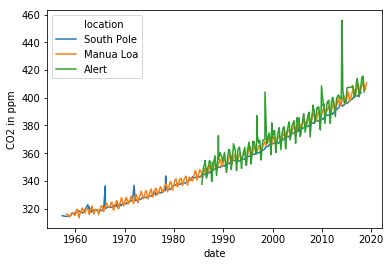

In [20]:
sns.lineplot(data=combined_df.sample(1000), x='date', y='CO2 in ppm', hue='location')

In [29]:
combined_df['year'] = combined_df.date.apply(lambda x: x.year)
combined_df['day'] = combined_df.date.apply(lambda x: x.day)
combined_df['month'] = combined_df.date.apply(lambda x: x.month)



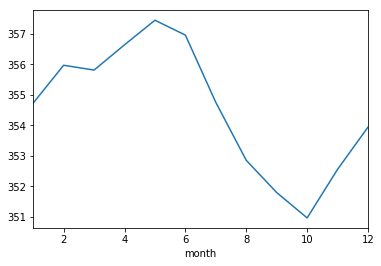

In [37]:
combined_df.loc[combined_df['location']=='Manua Loa'].groupby(['month'])['CO2 in ppm'].mean().plot(x='month', y='CO2 in ppm')

In [43]:
combined_df.loc[combined_df['location']=='Manua Loa'].groupby(['month']).std()['CO2 in ppm']

month
1     27.855524
2     27.748986
3     27.210873
4     27.801165
5     27.333019
6     27.401485
7     27.406171
8     27.239674
9     27.335060
10    27.306730
11    27.603286
12    28.027321
Name: CO2 in ppm, dtype: float64